In [2]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt

# Example: Simulating free bodies with the self-inverting "tippe-top"

""

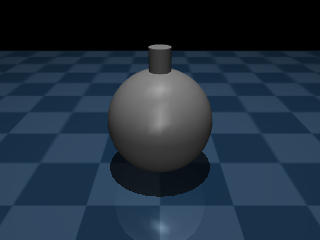

In [3]:
tippe_top = """
<mujoco model="tippe top">
  <option integrator="RK4"/>

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
     rgb2=".2 .3 .4" width="300" height="300"/>
    <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
  </asset>

  <worldbody>
    <geom size=".2 .2 .01" type="plane" material="grid"/>
    <light pos="0 0 .6"/>
    <camera name="closeup" pos="0 -.1 .07" xyaxes="1 0 0 0 1 2"/>
    <body name="top" pos="0 0 .02">
      <freejoint/>
      <geom name="ball" type="sphere" size=".02" />
      <geom name="stem" type="cylinder" pos="0 0 .02" size="0.004 .008"/>
      <geom name="ballast" type="box" size=".023 .023 0.005"  pos="0 0 -.015"
       contype="0" conaffinity="0" group="3"/>
    </body>
  </worldbody>

  <keyframe>
    <key name="spinning" qpos="0 0 0.02 1 0 0 0" qvel="0 0 0 0 1 200" />
  </keyframe>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(tippe_top)
renderer = mujoco.Renderer(model)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, camera="closeup")
media.show_image(renderer.render())

In [4]:
print('positions', data.qpos)
print('velocities', data.qvel)

positions [0.   0.   0.02 1.   0.   0.   0.  ]
velocities [0. 0. 0. 0. 0. 0.]


In [5]:
duration = 7    # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetDataKeyframe(model, data, 0)  # Reset the state to keyframe 0
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data, "closeup")
    pixels = renderer.render()
    frames.append(pixels)

media.show_video(frames, fps=framerate)

[3.84919048e-05 1.00964298e-05 3.99803299e-02]
[6.57756320e-05 3.86356152e-05 3.99665343e-02]
[7.59673001e-05 7.69727290e-05 3.99463747e-02]
[6.64532309e-05 1.15465321e-04 3.99265631e-02]
[3.96609376e-05 1.44335751e-04 3.99072347e-02]
[2.11086538e-06 1.56078533e-04 3.98884935e-02]
[-3.70287563e-05  1.47048268e-04  3.98704148e-02]
[-6.79559902e-05  1.18231162e-04  3.98530497e-02]
[-8.23886708e-05  7.50276852e-05  3.98364294e-02]
[-7.53948390e-05  2.60864660e-05  3.98205702e-02]
[-4.65043713e-05 -1.85652796e-05  3.98054781e-02]
[ 1.41387230e-07 -4.96959936e-05  3.97911537e-02]
[ 5.66390821e-05 -6.08815363e-05  3.97775946e-02]
[ 1.12993540e-04 -4.99194620e-05  3.97647985e-02]
[ 1.59252016e-04 -1.93371975e-05  3.97527632e-02]
[1.87643497e-04 2.41205711e-05 3.97414867e-02]
[1.94260306e-04 7.09200640e-05 3.97309653e-02]
[0.00017992 0.00011078 0.03972119]
[0.00014999 0.00013488 0.03971215]
[0.00011327 0.00013777 0.03970383]
[8.00975569e-05 1.18591669e-04 3.96961845e-02]
[6.01018882e-05 8.1230

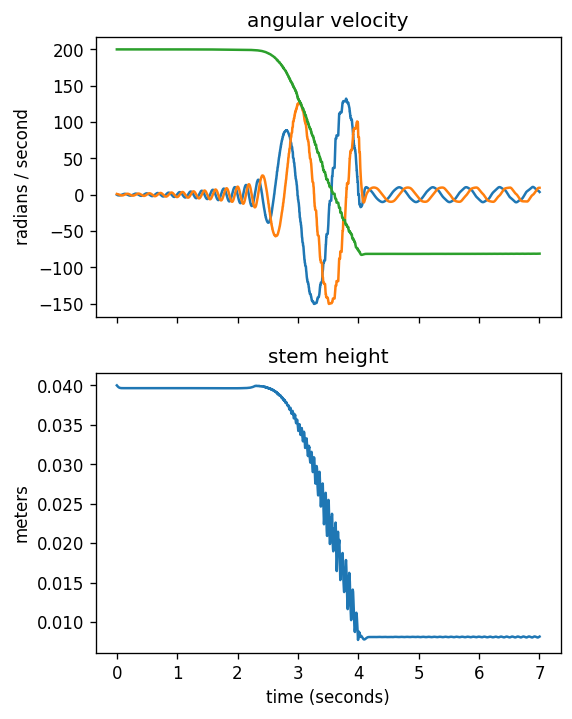

In [8]:
timevals = []
angular_velocity = []
stem_height = []

# Simulate and save data
mujoco.mj_resetDataKeyframe(model, data, 0)
while data.time < duration:
  mujoco.mj_step(model, data)
  timevals.append(data.time)
  angular_velocity.append(data.qvel[3:6].copy())
  stem_height.append(data.geom_xpos[2,2])

  print(data.geom_xpos[2])

dpi = 120
width = 600
height = 800
figsize = (width / dpi, height / dpi)
_, ax = plt.subplots(2, 1, figsize=figsize, dpi=dpi, sharex=True)

ax[0].plot(timevals, angular_velocity)
ax[0].set_title('angular velocity')
ax[0].set_ylabel('radians / second')

ax[1].plot(timevals, stem_height)
ax[1].set_xlabel('time (seconds)')
ax[1].set_ylabel('meters')
_ = ax[1].set_title('stem height')